In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

import import_ipynb

from use_function import *

importing Jupyter notebook from use_function.ipynb


## 여기서부터 💔
### 1️⃣ 나이
---
    최종 DATASET 에서 
    1. 나이를 IQR Range로 이상치처리
    2. np.log1p 스케일 적용!    

In [267]:
RAW = pd.read_csv('Data/FINAL_DOG_DOG.csv',encoding='euc-kr',index_col=0)

In [268]:
df_test = pd.read_csv('Data/FINAL_DOG_DOG.csv',encoding='euc-kr',index_col=0)
df_test.head(1)

,나이,보호장소,보호소이름,보호소전화번호,담당자,색상,유기번호,썸네일사진,접수일,발견장소,...,공고번호,공고시작일,담당자연락처,관할기관,사진,상태,성별,특징,체중,특이사항
0,2012(년생),서울특별시 양천구 등촌로 160 (목동) 1층,강현림동물병원,02-2642-9159,양천구청,갈색,4.113140e+14,http://www.animal.go.kr/files/shelter/2016/10/...,20170101,신정동신정119안전센터 (다음1-1),...,서울-양천-2017-00001,20170101,02-2620-4918,서울특별시 양천구,http://www.animal.go.kr/files/shelter/2016/10/...,종료(입양),M,치석ㅇ&#47552;으며온순하고잘따르나천방지축임,38(Kg),NaN


In [269]:
df_test['나이'].unique()

array(['2012(년생)', '2013(년생)', '2016(년생)', '2014(년생)', '2015(년생)',
       '2017(년생)', '2007(년생)', '2011(년생)', '2010(년생)', '2006(년생)',
       '2004(년생)', '2009(년생)', '2002(년생)', '2008(년생)', '1(년생)',
       '2005(년생)', '2003(년생)', '5(년생)', '1999(년생)', '1988(년생)',
       '2000(년생)', '10(년생)', '1997(년생)', '2001(년생)', '2015 (년생)', '2(년생)',
       '3(년생)', '0(년생)', '1998(년생)', '`(년생)', '2018(년생)', '2019(년생)',
       '1992(년생)', '-(년생)', '(년생)', '4(년생)', '1993(년생)', '20118(년생)',
       '208(년생)', '201(년생)', '1018(년생)', '7(년생)', '2020(년생)', '17(년생)',
       '1991(년생)', '1995(년생)', '219(년생)', '1996(년생)', '20200407(년생)',
       '20200110(년생)', '20160409(년생)', '2021(년생)', '2020_1(년생)',
       '20200409(년생)', '12(년생)', '2020.(년생)'], dtype=object)

In [270]:
df_test['나이'] = df_test['나이'].apply(lambda x : x[:-4])
df_test['나이'].unique()

array(['2012', '2013', '2016', '2014', '2015', '2017', '2007', '2011',
       '2010', '2006', '2004', '2009', '2002', '2008', '1', '2005',
       '2003', '5', '1999', '1988', '2000', '10', '1997', '2001', '2015 ',
       '2', '3', '0', '1998', '`', '2018', '2019', '1992', '-', '', '4',
       '1993', '20118', '208', '201', '1018', '7', '2020', '17', '1991',
       '1995', '219', '1996', '20200407', '20200110', '20160409', '2021',
       '2020_1', '20200409', '12', '2020.'], dtype=object)

In [271]:
df_test['나이'] = df_test['나이'].replace('','바보')

In [272]:
df_test['나이'] = df_test.replace('`','바보')
df_test['나이'] = df_test.replace('-','바보')


In [273]:
df_test['나이'].unique()

array(['2012', '2013', '2016', '2014', '2015', '2017', '2007', '2011',
       '2010', '2006', '2004', '2009', '2002', '2008', '1', '2005',
       '2003', '5', '1999', '1988', '2000', '10', '1997', '2001', '2015 ',
       '2', '3', '0', '1998', '바보', '2018', '2019', '1992', '4', '1993',
       '20118', '208', '201', '1018', '7', '2020', '17', '1991', '1995',
       '219', '1996', '20200407', '20200110', '20160409', '2021',
       '2020_1', '20200409', '12', '2020.'], dtype=object)

In [274]:
df_age = df_test.loc[df_test['나이'] != '바보']
df_age['나이'].unique()

array(['2012', '2013', '2016', '2014', '2015', '2017', '2007', '2011',
       '2010', '2006', '2004', '2009', '2002', '2008', '1', '2005',
       '2003', '5', '1999', '1988', '2000', '10', '1997', '2001', '2015 ',
       '2', '3', '0', '1998', '2018', '2019', '1992', '4', '1993',
       '20118', '208', '201', '1018', '7', '2020', '17', '1991', '1995',
       '219', '1996', '20200407', '20200110', '20160409', '2021',
       '2020_1', '20200409', '12', '2020.'], dtype=object)

In [275]:
df_test = df_age

In [276]:
df_test = df_test[df_test['나이'].apply(lambda x : len(x) == 4)]

In [277]:
df_test['나이'].unique()

array(['2012', '2013', '2016', '2014', '2015', '2017', '2007', '2011',
       '2010', '2006', '2004', '2009', '2002', '2008', '2005', '2003',
       '1999', '1988', '2000', '1997', '2001', '1998', '2018', '2019',
       '1992', '1993', '1018', '2020', '1991', '1995', '1996', '2021'],
      dtype=object)

In [278]:
df_test = df_test[df_test['나이'] != '1018']
df_test['나이'].unique()

array(['2012', '2013', '2016', '2014', '2015', '2017', '2007', '2011',
       '2010', '2006', '2004', '2009', '2002', '2008', '2005', '2003',
       '1999', '1988', '2000', '1997', '2001', '1998', '2018', '2019',
       '1992', '1993', '2020', '1991', '1995', '1996', '2021'],
      dtype=object)

In [279]:
df_test.shape

(428727, 23)

In [280]:
df_test['나이'] = df_test['나이'].astype('int')


### 2️⃣ 접수일 💫

In [281]:
df_test['접수일'] = df_test['접수일'].astype('str')

In [282]:
df_test['접수일']= df_test['접수일'].apply(lambda x : x[:4])


In [283]:
df_test['접수일'].unique()

array(['2017', '2018', '2019', '2020', '2021'], dtype=object)

In [284]:
df_test['접수일'] = df_test['접수일'].astype('int')


In [285]:
df_test['당시의나이'] = df_test['접수일'] - df_test['나이']

In [286]:
df_test['당시의나이'].value_counts()

 0     159569
 1      64394
 2      62715
 3      52435
 4      24380
 5      24252
 6      10571
 10      8304
 7       8036
 8       7316
 9       1830
 12      1693
 15       920
 13       885
 11       629
 14       379
-1        183
 17        88
 16        82
 18        31
 20        13
 19        11
 21         2
 22         2
 24         2
 29         2
 25         1
 26         1
 28         1
Name: 당시의나이, dtype: int64

In [287]:
df_test['당시의나이'] = df_test['당시의나이'].replace(-1,0)
df_test.head(1)

,나이,보호장소,보호소이름,보호소전화번호,담당자,색상,유기번호,썸네일사진,접수일,발견장소,...,공고시작일,담당자연락처,관할기관,사진,상태,성별,특징,체중,특이사항,당시의나이
0,2012,서울특별시 양천구 등촌로 160 (목동) 1층,강현림동물병원,02-2642-9159,양천구청,갈색,4.113140e+14,http://www.animal.go.kr/files/shelter/2016/10/...,2017,신정동신정119안전센터 (다음1-1),...,20170101,02-2620-4918,서울특별시 양천구,http://www.animal.go.kr/files/shelter/2016/10/...,종료(입양),M,치석ㅇ&#47552;으며온순하고잘따르나천방지축임,38(Kg),NaN,5


In [288]:
df_test['당시의나이'].unique()

array([ 5,  4,  1,  3,  2,  0, 10,  6,  7, 11, 13,  8, 15,  9, 12, 14, 18,
       29, 17, 20, 16, 19, 26, 25, 28, 24, 22, 21], dtype=int32)

In [289]:
df_test.to_csv("Data/#1_나이까지.csv",encoding='cp949')

## 2️⃣ 중성화 🔯
---
    N --> 0
    U --> 1
    Y --> 2
    
    후에 U (UnKnown) 데이터를 cleansing (날림)

In [290]:
df_test = pd.read_csv('Data/#1_나이까지.csv',encoding='cp949',index_col=0)


In [291]:
df_test.columns

Index(['나이', '보호장소', '보호소이름', '보호소전화번호', '담당자', '색상', '유기번호', '썸네일사진', '접수일',
       '발견장소', '품종', '중성화여부', '공고종료일', '공고번호', '공고시작일', '담당자연락처', '관할기관', '사진',
       '상태', '성별', '특징', '체중', '특이사항', '당시의나이'],
      dtype='object')

In [292]:
df_test['중성화여부'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [293]:
df_test['중성화여부'] = pd.Categorical(df_test['중성화여부'])
df_test['중성화여부'] = df_test['중성화여부'].map({'N' : 0 , 'U' : 1, 'Y' : 2})

In [294]:
df_test['중성화여부'].unique()

[0, 2, 1]
Categories (3, int64): [0, 2, 1]

In [295]:
df_test.to_csv('Data/#2_중성화까지.csv',encoding='euc-kr')

### Drop Columns 💢
---

In [296]:
df_test.columns

Index(['나이', '보호장소', '보호소이름', '보호소전화번호', '담당자', '색상', '유기번호', '썸네일사진', '접수일',
       '발견장소', '품종', '중성화여부', '공고종료일', '공고번호', '공고시작일', '담당자연락처', '관할기관', '사진',
       '상태', '성별', '특징', '체중', '특이사항', '당시의나이'],
      dtype='object')

## 3️⃣ 체중 💦 --> 💥 Catch Point 💥
---
    1. outlier 를 제거한후 ( IQRange )
    2. np.log1p --> 를 이용하여 scale 
    

In [297]:
# df_prac 으로 사용하기 

df_prac = df_test[['공고번호','보호소이름','품종','색상','성별','체중','중성화여부','당시의나이','상태','접수일']]


### 정규식으로 쉽게 💌

In [298]:

df_prac['체중'] = df_test['체중'].apply(lambda x : x[:-4])
df_prac[['체중_소수점','체중_정수']] = df_prac['체중'].str.extract(r'(\d+\.\d+)|(\d+)')
df_prac['체중']=  df_prac['체중_소수점'].fillna(df_prac['체중_정수'])

df_prac = df_prac.loc[df_prac['체중'].apply(lambda x: x is not np.NaN)]
df_prac = df_prac.loc[df_prac['체중'].apply(lambda x: x is not None)]

df_prac['체중'] = df_prac['체중'].astype('float')


In [299]:
df_prac['체중'].isnull().sum()

0

#### 체중 Outlier 처리 --- 💨
---

In [300]:
df_prac['체중'].unique()

array([ 38.  ,   3.1 ,   5.  , ..., 310.  , 230.  ,  27.66])

In [301]:
df_prac[df_prac['체중'].apply(lambda x : x >= 100)].index

Int64Index([  3559,  12929,  14164,  14527,  15865,  23510,  24615,  31106,
             33483,  39176,
            ...
            425942, 425943, 426063, 426064, 426083, 426303, 426304, 426308,
            426330, 426331],
           dtype='int64', length=162)

In [302]:
change_weight_index = df_prac[df_prac['체중'].apply(lambda x : x >= 100)].index

In [303]:
new_weight = df_prac.loc[change_weight_index, '체중'].apply(lambda x : x / 1000)

In [304]:
df_prac.loc[change_weight_index, '체중'] = new_weight

In [305]:
df_prac[df_prac['체중'] == 20180.323]

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태,접수일,체중_소수점,체중_정수
90784,경기-평택-2018-00509,평택시유기동물보호소,[개] 믹스견,기타,F,20180.323,0,0,종료(입양),2018,NaN,20180323


In [306]:
df_prac.drop(90784,axis=0, inplace=True)

<AxesSubplot:xlabel='체중'>

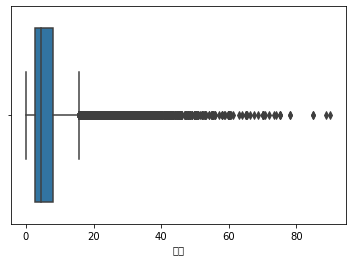

In [307]:
sns.boxplot('체중', data=df_prac)

In [308]:
# 오예

df_prac.to_csv('Data/#3_체중까지.csv',encoding='cp949')

---
## 성별 💤

In [309]:
df_3 = pd.read_csv('Data/#3_체중까지.csv',encoding='cp949',index_col=0)

In [310]:
df_3['성별'].unique()

array(['M', 'F', 'Q'], dtype=object)

In [311]:
df_3 = df_3.loc[df_3['성별'] != 'Q']


In [312]:
df_3['성별'] = pd.Categorical(df_3['성별'])

df_3['성별'] = df_3['성별'].map({'M': 0, 'F': 1})

In [313]:
df_3['성별'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [314]:
df_3.to_csv('Data/#4_성별까지.csv',encoding='cp949')

---
## 4️⃣ 상태 💤
---
입양 --> 걍 두고 |  y = 1 <br>

반환 --> 주인한테 돌아간거 |  drop <br>
미포획 --> 탈주의 가능성 높음 | drop <br>
기증 --> 다른 센터나 보호소로 보냄 | drop <br>
보호중 --> 보호중 |  drop <br>
방사 --> 탈주 |  drop 

자연사 --> 사망 | y = 자연사 <br>
안락사 --> 사망 | y = 안락사 <br>

In [315]:
df_4 = pd.read_csv('Data/#4_성별까지.csv',encoding='cp949',index_col=0)

In [316]:
df_4['상태'] = pd.Categorical(df_4['상태'])

In [317]:
df_4['상태'].unique()

['종료(입양)', '종료(반환)', '종료(미포획)', '종료(자연사)', '종료(기증)', '종료(안락사)', '보호중', '종료(방사)']
Categories (8, object): ['종료(입양)', '종료(반환)', '종료(미포획)', '종료(자연사)', '종료(기증)', '종료(안락사)', '보호중', '종료(방사)']

In [318]:
df_4['옵션'] = df_4['상태'].str.split('(',expand= True)[1]

In [319]:
df_4['옵션'] = df_4['옵션'].str.replace(')','')

In [320]:
df_4['옵션1'] = df_4['상태'].str.split('(',expand=True)[0]

In [321]:
df_4['상태'] = df_4['옵션'].fillna(df_4['옵션1'])

In [322]:
df_4['상태'].unique()

array(['입양', '반환', '미포획', '자연사', '기증', '안락사', '보호중', '방사'], dtype=object)

In [323]:
df_4.drop(['체중_소수점','체중_정수','옵션','옵션1'],axis=1,inplace=True)

In [324]:
df_4['상태'].unique()

array(['입양', '반환', '미포획', '자연사', '기증', '안락사', '보호중', '방사'], dtype=object)

In [325]:
df_4[df_4['상태'] != '입양']

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태,접수일
4,전남-여수-2017-00002,유기동물보호소,[개] 말티즈,흰색,0,1.4,0,2,반환,2017
6,충남-천안-2017-00028,천안시유기동물보호소,[개] 포메라니안,블랙탄,0,3.0,0,4,미포획,2017
7,충남-천안-2017-00027,천안시유기동물보호소,[개] 시츄,브라운,1,4.0,0,1,미포획,2017
9,충남-천안-2017-00025,천안시유기동물보호소,[개] 골든 리트리버,골든색,0,40.0,0,1,반환,2017
11,충남-천안-2017-00023,천안시유기동물보호소,[개] 믹스견,흰베이지,1,0.5,0,0,미포획,2017
...,...,...,...,...,...,...,...,...,...,...
428797,경북-포항-2021-01148,영일동물플러스,[개] 믹스견,흑황백,1,1.3,0,0,보호중,2021
428798,충남-청양-2021-00096,청양보호소,[개] 푸들,회색,0,3.0,0,1,보호중,2021
428799,경기-화성-2021-01373,남양유기견보호센터,[개] 말티즈,흰색,1,5.0,1,4,보호중,2021
428800,경북-상주-2021-00513,상주유기동물보호센터,[개] 믹스견,흰,1,8.0,1,0,보호중,2021


In [326]:
# 쓸모없는 상태를 버리고 

df_4 = df_4[(df_4['상태'] != '방사' ) & (df_4['상태'] != '미포획') & (df_4['상태'] != '반환') & (df_4['상태'] != '기증') & (df_4['상태'] != '보호중')  ]
df_4['상태'].unique()
# 상태를 두 분류로 나눈다.

df_4.loc[df_4['상태'] != '입양','상태'] = '입양아님'

# 그리고 카테고리화 하고 / 1,0 으로 바꾸기
df_4['상태'] = pd.Categorical(df_4['상태'])
df_4['상태'] = df_4['상태'].map({'입양': 1, '입양아님' : 0})

df_4.head(2)

,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태,접수일
0,서울-양천-2017-00001,강현림동물병원,[개] 골든 리트리버,갈색,0,38.0,0,5,1,2017
1,서울-중랑-2017-00003,한국동물구조관리협회,[개] 푸들,갈,0,3.1,0,4,1,2017


In [327]:
df_4['상태'].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [328]:
df_4.to_csv('Data/#5_상태까지.csv',encoding='cp949')

---
## 6️⃣ 종 💤
    1. animal.go.kr 에 존재하는 리스트에 종류와 존재하지 않는 종류를 추려낸다.
    2. 존재하지 않는 종류 --> 10개이상인 value 들만 추려낸다.
    3. 존재하지 않느 종류에 naming 을 // 우리가 존재하는 리스트에 naming 으로 바꿔준다.
    4. 그리고 최종으로 합친다.
    5. 그 후 https://www.akc.org/dog-breeds/foundation-stock-service/ (American Kernel Club) 에서 제공해주는 종류로 종을 분류하였다.
---

## 가져온 종류와 기존의 DATASET 비교 💔
---

   



In [3]:
df_kinds = pd.read_csv('Data/#5_상태까지.csv',encoding='cp949',index_col=0)

kinds = pd.read_csv('Data/바보.csv',encoding='cp949',index_col=0)


In [4]:
df_kinds['품종'] = df_kinds['품종'].apply(lambda x : x[4:])

In [5]:
kinds_list = np.array(kinds['0'].tolist())
kinds_list = kinds_list.tolist()

In [6]:
for i in range(len(kinds_list)):
    kinds_list[i] = kinds_list[i].replace(' ','')

In [7]:
kinds_list.append('골든리트리버')

In [8]:
'''공백을 없애자'''

df_kinds['품종'] = df_kinds['품종'].str.replace(' ','')


In [9]:
''' 믹스견을 처리하자 '''

mixed_index = df_kinds[df_kinds['품종'].str.contains('혼합|혼종|잡종|mix|믹스|믹스견|&|잡견|혼혈')].index
df_kinds.loc[mixed_index,'품종']='믹스견'

#### 종류_list에 안 속해있는 놈들 ❌
---

In [10]:
df_kinds_error = df_kinds[df_kinds['품종'].apply(lambda x : x in kinds_list) == False]

##### 수가 10개 이상인 품종을 찾자

In [11]:
value_10_over = pd.DataFrame(df_kinds_error['품종'].value_counts() > 10)

In [12]:
value_true = value_10_over[value_10_over['품종'] == True]

##### 기존에 가지고 있는 list랑 이름을 맞춰주자

In [13]:
value_true = value_true.index.tolist()

In [14]:
value_true

['발바리',
 '폼피츠',
 '발발이',
 '래브라도리트리버',
 '미니핀',
 '들개',
 '허스키',
 '진도',
 '비숑',
 '풍산개',
 '말티푸',
 '재래종',
 '리트리버',
 '사냥개',
 '잉글리쉬쉽독',
 '레브라도리트리버']

In [15]:
value_check = pd.read_excel('Data/아아.xlsx')
value_check = value_check[0].tolist()

In [16]:
value_final = []

for i in range(len(value_check)):
    value_final.append(value_check[i])

In [17]:
for i in range(len(value_final)):
    if value_final[i] == 0:
        value_final[i] = '바보'

In [18]:
df_kinds_error = df_kinds_error[df_kinds_error['품종'].apply(lambda x : x in value_true)]
df_kinds_error['품종'].value_counts()

발바리         696
폼피츠          42
발발이          39
래브라도리트리버     29
미니핀          26
들개           24
허스키          20
진도           16
비숑           14
풍산개          13
말티푸          13
재래종          13
리트리버         12
레브라도리트리버     11
사냥개          11
잉글리쉬쉽독       11
Name: 품종, dtype: int64

In [19]:
for i in range(len(value_final)):
    df_kinds_error.loc[df_kinds_error['품종']== value_true[i],'품종'] = value_final[i]
    


In [20]:
df_kinds_error = df_kinds_error.loc[df_kinds_error['품종'] != '바보']

In [21]:
df_kinds_error['품종'].value_counts()

발바리         735
폼피츠          42
라브라도리트리버     40
미니어처핀셔       26
들개           24
시베리안허스키      20
진도견          16
비숑프리제        14
믹스견          13
레브라도리트리버     11
사냥개          11
Name: 품종, dtype: int64

#### 종류 list에 속해있는 놈들 ⭕
---

In [22]:
df_kinds_true = df_kinds[df_kinds['품종'].apply(lambda x : x in kinds_list) == True]

In [23]:
len(df_kinds_true)

349924

##### 최종 종류를 합쳐보자! 💫
---

In [24]:
df_6 = pd.concat([df_kinds_true,df_kinds_error])
df_6['품종'] = df_6['품종'].str.replace('진도견견','진도견')

In [25]:
types = pd.read_csv('./Data/종분류.csv', encoding = 'cp949', index_col = 0)
types.shape

(160, 1)

In [26]:
types = pd.read_csv('./Data/종분류.csv', encoding = 'cp949', index_col = 0)
types.head(1)

,분류
골든리트리버,sporting


In [27]:
for i in range(len(types)) : 
    df_6.loc[df_6['품종'] == types.index[i],'품종'] = types['분류'][i]

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_6['품종'].unique())

labels = encoder.transform(df_6['품종'].unique())

print('인코딩 변환값 : ', labels)

인코딩 변환값 :  [ 5  4  3  7  6  0  8  2  1  9 12 13 10 11]


In [29]:
labels

array([ 5,  4,  3,  7,  6,  0,  8,  2,  1,  9, 12, 13, 10, 11])

In [34]:
# 디코딩 변환 값

print('디코딩 변환 값 :', encoder.inverse_transform([9]))

디코딩 변환 값 : ['기타']


In [357]:
품종_고유값 = df_6['품종'].unique()

In [358]:
# category 화 

df_6['품종'] = pd.Categorical(df_6['품종'])
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327469 entries, 0 to 418381
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   공고번호    327469 non-null  object  
 1   보호소이름   327469 non-null  object  
 2   품종      327469 non-null  category
 3   색상      327460 non-null  object  
 4   성별      327469 non-null  int64   
 5   체중      327469 non-null  float64 
 6   중성화여부   327469 non-null  int64   
 7   당시의나이   327469 non-null  int64   
 8   상태      327469 non-null  int64   
 9   접수일     327469 non-null  int64   
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 25.3+ MB


In [359]:
for i in range(len(labels)):
    df_6['품종'] = df_6['품종'].replace(품종_고유값[i], labels[i])

In [360]:
df_6['품종'].value_counts()

3    235289
7     35701
4     22412
0     15016
5      6453
8      3533
2      3481
1      3093
9      1877
6       614
Name: 품종, dtype: int64

In [361]:
df_6.to_csv('Data/#6_품종까지.csv',encoding='cp949')

### 7️⃣ 색상 💫
---
    How To ?
    색상을 5가지 종류로 모두 전처리하였다. 

In [362]:
df_6 = pd.read_csv('Data/#6_품종까지.csv',encoding='cp949', index_col=0)

In [363]:
final_color = pd.read_csv('Data/FInal_Color.csv',encoding='utf-8',index_col=0)
final_color['색상최종'].unique()

array(['혼합', '흰색', '갈색', '검정색', '노란색'], dtype=object)

In [364]:
df_7 = pd.merge(df_6,final_color, how='inner', on='공고번호')
df_7['색상'] = df_7['색상최종']

In [365]:
df_7.drop('색상최종',axis=1,inplace=True)

In [366]:
df_7['색상'] = pd.Categorical(df_7['색상'])

#### 흰색 - 1, 검정색 - 2, 노란색 - 3, 갈색 - 4, 혼합 - 5

In [367]:
df_7['색상'] = df_7['색상'].map({'흰색' : 1, '검정색' : 2, '노란색': 3,'갈색': 4, '혼합' : 5})

In [368]:
df_7.to_csv('Data/#7_색상까지_FINAL.csv',encoding='cp949')

#### 최종 DATASET 💝
---
    범주화 했던 자료들을 --> 데이터셋을 불러오고 나서, category 타입으로 바꿔주자
    
    품종
    색상
    성별
    체중
    중성화여부
    상태
    
    
    

In [369]:
df_final = pd.read_csv('Data/#7_색상까지_FINAL.csv',encoding='cp949',index_col=0)
df_final.head(2)


,공고번호,보호소이름,품종,색상,성별,체중,중성화여부,당시의나이,상태,접수일
0,서울-양천-2017-00001,강현림동물병원,5,4,0,38.0,0,5,1,2017
1,서울-중랑-2017-00003,한국동물구조관리협회,4,4,0,3.1,0,4,1,2017


### 8️⃣ 직영과 위탁을 나누자 💢
---
    직영보호소 list ()
    
    직영보호소 list에 포함하지 않는 곳을 위탁으로 지정하여
    
    직영과 위탁을 나눴다. 



In [373]:
df_money = pd.read_csv('./Data/위탁보호소.csv',encoding='cp949',index_col=0)
df_service = pd.read_csv('./Data/직영보호소.csv',encoding='cp949',index_col=0)

service_list=  list(df_service['보호소이름'].unique())
money_list = list(df_money['보호소이름'].unique())

직영 = df_final[df_final['보호소이름'].apply(lambda x : x in service_list)]
위탁 = df_final[df_final['보호소이름'].apply(lambda x : x in money_list)]

직영 = 직영[['품종','색상','성별','체중','중성화여부','당시의나이', '상태','접수일']]
위탁 = 위탁[['품종','색상','성별','체중','중성화여부','당시의나이', '상태','접수일']]

직영.to_csv('Data/직영.csv',encoding='cp949')
위탁.to_csv('Data/위탁.csv',encoding='cp949')

## Final_Process
---

In [4]:
dataset = pd.read_csv('Data/#9_Final_Check_품종안바꾼거.csv',encoding='cp949',index_col=0)
dataset.head(1)

,품종,색상,성별,체중,중성화여부,당시의나이,상태
0,7,1,0,3.1,0,3,1


In [5]:
dataset.to_csv('Data/9_Final_Check_품종안바꾼거.csv',encoding='cp949')

### Mix 와 No_Mix 로 나누기
---

In [9]:


df_no_mix = divide_mix(dataset)[0]

df_no_mix = df_no_mix.reset_index()

df_no_mix.drop('index',axis=1,inplace=True)

#### Outlier 제거
---
    IQR Range 제거법 사용

In [10]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df_no_mix, column='체중', weight=1.5)
df_no_mix.drop(outlier_idx, axis=0, inplace=True)

In [11]:
# 함수 사용해서 이상치(당시의나이) 삭제 
outlier_idx = get_outlier(df=df_no_mix, column='당시의나이', weight=1.5)
df_no_mix.drop(outlier_idx, axis=0, inplace=True)

#### Scale 조정
---
    np.log1p 사용

In [12]:
df_no_mix['체중'] = np.log1p(df_no_mix['체중'])

In [13]:
df_no_mix['당시의나이'] = np.log1p(df_no_mix['당시의나이'])

In [16]:
df_no_mix= df_no_mix.reset_index()
df_no_mix.drop('index',axis=1,inplace=True)

In [17]:
df_no_mix.to_csv('Data/#12_최최종.csv',encoding='cp949')